In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt



### **Check for GPU**

In [3]:
physical_devices =tf.config.experimental.list_physical_devices("GPU")
#physical_devices
print("Num GPU's Available: ",len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPU's Available:  1


## **Load Dataset**

In [4]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# **show some sample images of data sets with corresponding lables**

Example training images and their lables:['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


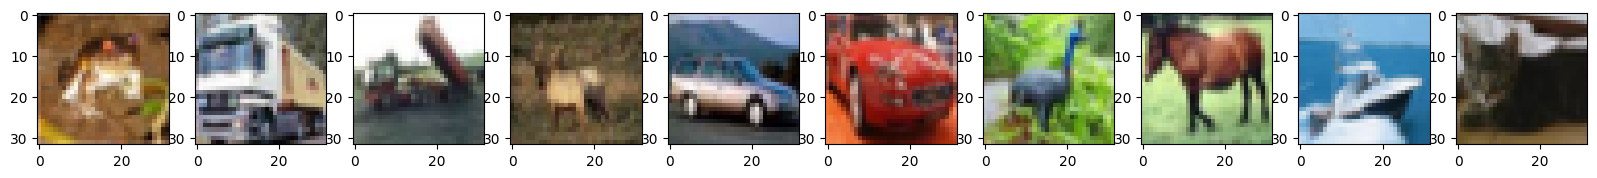

In [5]:
cifar10_classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print('Example training images and their lables:'+str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig,axarr=plt.subplots(1,10)
fig.set_size_inches(20,6)

for i in range(10):
  image=x_train[i]
  axarr[i].imshow(image)
plt.show()

In [6]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

# **preparing datasets**

In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [9]:
ann=keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
"""
ann.add(Dense(3000,activation='relu'))
ann.add(Dense(1000,activation='relu'))
ann.add(Dense(10,activation='sigmoid'))
"""

#ann.add(Dense(1048,activation='relu'))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       6,293,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,313,994 (24.09 MB)

 Trainable params: 6,313,994 (24.09 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history=ann.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4964 - loss: 1.4183 - val_accuracy: 0.4559 - val_loss: 1.5153
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5077 - loss: 1.3967 - val_accuracy: 0.4799 - val_loss: 1.4654
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5046 - loss: 1.3880 - val_accuracy: 0.4826 - val_loss: 1.4739
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5165 - loss: 1.3692 - val_accuracy: 0.4798 - val_loss: 1.4986
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5171 - loss: 1.3610 - val_accuracy: 0.4756 - val_loss: 1.4917
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5169 - loss: 1.3618 - val_accuracy: 0.4819 - val_loss: 1.4829
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5177 - loss: 1.3425 - val_accuracy: 0.4923 - val_loss: 1.4537
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5247 - loss: 1.3353 -

"\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')"

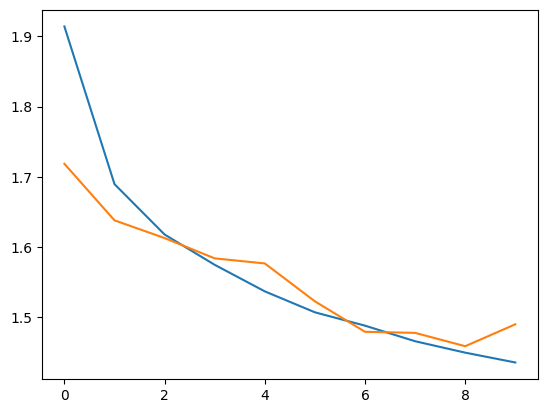

In [13]:
#training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
"""
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')"""

"\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')"

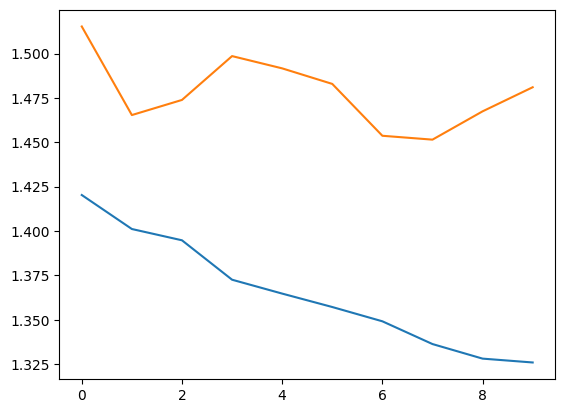

In [15]:
#training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
"""
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')"""

In [16]:
#CNN
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [17]:
cnn=keras.Sequential()
cnn.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,666 (1.73 MB)

 Trainable params: 454,666 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=cnn.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9330 - loss: 0.1887 - val_accuracy: 0.7365 - val_loss: 1.1155
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9498 - loss: 0.1424 - val_accuracy: 0.7229 - val_loss: 1.2734
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9508 - loss: 0.1368 - val_accuracy: 0.7294 - val_loss: 1.2908
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9556 - loss: 0.1285 - val_accuracy: 0.7317 - val_loss: 1.3483
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9592 - loss: 0.1165 - val_accuracy: 0.7272 - val_loss: 1.5342
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9578 - loss: 0.1228 - val_accuracy: 0.7241 - val_loss: 1.4472
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9617 - loss: 0.1090 - val_accuracy: 0.7309 - val_loss: 1.4693
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9654 - loss: 0.0979

In [20]:
def plotLosses(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','validation'],loc='upper right')
  plt.show()

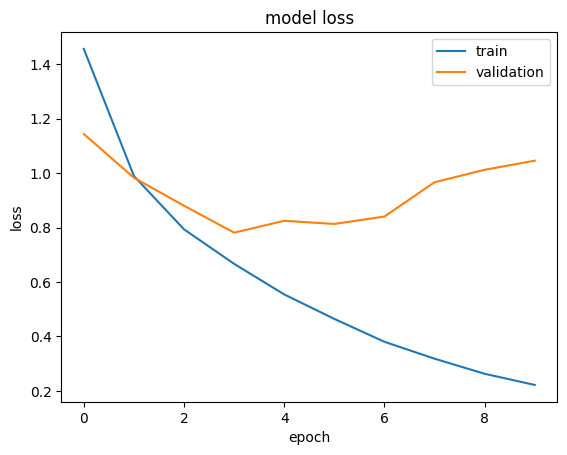

In [21]:
plotLosses(history)

In [23]:
def plotLosses(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','validation'],loc='upper right')
  plt.show()

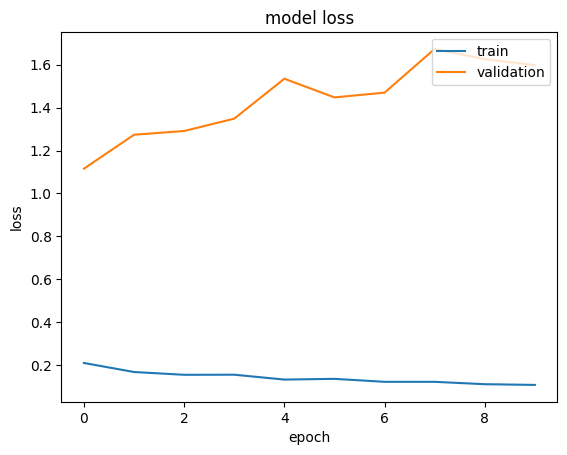

In [24]:
plotLosses(history)

In [25]:
def plotAccuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

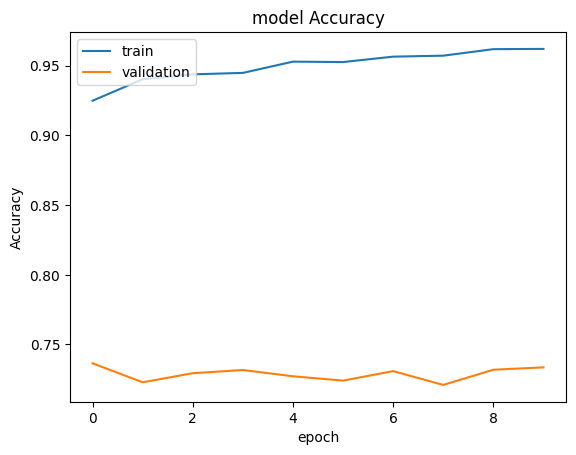

In [26]:
plotAccuracy(history)

In [27]:
score=cnn.evaluate(x_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7353 - loss: 1.5760


In [28]:
print(cnn.metrics_names)
print(score)

['loss', 'compile_metrics']
[1.597265601158142, 0.7336000204086304]


In [29]:
from keras .models import load_model
cnn.save('cifar10_model.h5')

In [30]:
from google.colab import files
files.download('cifar10_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>